<a href="https://colab.research.google.com/github/Knell999/ML_Ops_HK-Toss/blob/main/Chapter_1_%EA%B8%B0%EC%B4%88/02_%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%8F%84%EA%B5%AC/04_%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EA%B8%B0%EB%B0%98%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/05_%EC%A7%80%ED%95%98%EC%B2%A0_2%ED%98%B8%EC%84%A0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px

data = pd.read_csv("/content/data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding='euc-kr')
data.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202307,1호선,동대문,710,31,11581,2095,9027,6829,14177,...,8930,511,2412,0,216,0,0,0,0,20230803
1,202307,1호선,동묘앞,221,2,3012,1090,3682,5042,7336,...,4195,104,1649,0,272,0,0,0,0,20230803
2,202307,1호선,서울역,577,37,8434,9396,13088,51243,40143,...,13987,2297,2598,1,219,0,0,0,0,20230803
3,202307,1호선,시청,49,5,2381,4825,3784,22736,7558,...,4285,287,1085,0,12,0,0,0,0,20230803
4,202307,1호선,신설동,392,35,8967,2356,9520,8509,21822,...,9505,317,2244,0,0,0,0,0,0,20230803


# 분석할 내용
- 승차 인원이 가장 많은 역은?
- 연도별로 혹은 월별로 승차 인원 추이에 차이가 있는가?
- 시간대별로 가장 승차인원이 많은 역은?
- 지하철역 시간대별 인원 유형 군집화
- 지도에 분석 결과를 시각화하기

In [ ]:
# 날짜 컬럼 추가
data['연도'] = pd.to_datetime(data['사용월'], format='%Y%m').dt.year
data['월'] = pd.to_datetime(data['사용월'], format='%Y%m').dt.month

In [ ]:
data.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,연도,월
0,202307,1호선,동대문,710,31,11581,2095,9027,6829,14177,...,2412,0,216,0,0,0,0,20230803,2023,7
1,202307,1호선,동묘앞,221,2,3012,1090,3682,5042,7336,...,1649,0,272,0,0,0,0,20230803,2023,7
2,202307,1호선,서울역,577,37,8434,9396,13088,51243,40143,...,2598,1,219,0,0,0,0,20230803,2023,7
3,202307,1호선,시청,49,5,2381,4825,3784,22736,7558,...,1085,0,12,0,0,0,0,20230803,2023,7
4,202307,1호선,신설동,392,35,8967,2356,9520,8509,21822,...,2244,0,0,0,0,0,0,20230803,2023,7


In [ ]:
# 2018년 부터 2호선
data = data.query('호선명 == "2호선" and 연도 >= 2018')
data.tail()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,연도,월
39852,201801,2호선,종합운동장,16,1,5482,1666,8502,11616,23624,...,3206,7,143,2,2,0,0,20180203,2018,1
39853,201801,2호선,충정로(경기대입구),35,19,3435,1114,7825,6722,18950,...,2910,1,82,0,0,0,0,20180203,2018,1
39854,201801,2호선,한양대,19,11,1252,471,2634,5582,6349,...,1361,2,24,0,0,0,0,20180203,2018,1
39855,201801,2호선,합정,152,52,10582,3237,18773,18726,50049,...,8398,1,278,0,0,0,0,20180203,2018,1
39856,201801,2호선,홍대입구,1981,47,44924,4590,43748,21918,77790,...,21738,5,2355,0,0,0,0,20180203,2018,1


In [ ]:
data['지하철역'] = [ station_name[0] for station_name in data['지하철역'].str.split('(')]
data.head()

<ipython-input-103-a64721a2f827>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,연도,월
10,202307,2호선,강남,120,14,9359,10930,18503,56268,40112,...,6609,3,47,0,0,0,0,20230803,2023,7
11,202307,2호선,강변,27,1,8936,2251,28877,21987,78164,...,5412,1,39,0,0,0,0,20230803,2023,7
12,202307,2호선,건대입구,290,1,16965,1813,22074,15573,53127,...,10526,3,862,0,0,0,0,20230803,2023,7
13,202307,2호선,교대,15,0,2693,6957,11535,25054,25250,...,3275,2,15,0,0,0,0,20230803,2023,7
14,202307,2호선,구로디지털단지,369,39,38505,5472,53882,20639,144838,...,14233,6,308,0,0,0,0,20230803,2023,7


In [ ]:
on_col = [ col for col in data.columns if '승차' in col]
query_col = ['사용월', '연도', '월', '지하철역'] + on_col
data = data[query_col]
data.head()

,사용월,연도,월,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
10,202307,2023,7,강남,120,9359,18503,40112,64256,52713,...,327480,215011,172551,196756,177694,80992,13773,3,0,0
11,202307,2023,7,강변,27,8936,28877,78164,117728,82763,...,61291,43557,32792,27539,19267,7874,1058,1,0,0
12,202307,2023,7,건대입구,290,16965,22074,53127,91248,61438,...,85337,64419,65838,72636,74202,45555,7559,3,0,0
13,202307,2023,7,교대,15,2693,11535,25250,36820,27461,...,133358,62654,51239,53658,42819,15754,3171,2,0,0
14,202307,2023,7,구로디지털단지,369,38505,53882,144838,184498,112257,...,210532,101581,65184,55202,41572,18845,3463,6,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3350 entries, 10 to 39856
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           3350 non-null   int64 
 1   연도            3350 non-null   int32 
 2   월             3350 non-null   int32 
 3   지하철역          3350 non-null   object
 4   04시-05시 승차인원  3350 non-null   int64 
 5   05시-06시 승차인원  3350 non-null   int64 
 6   06시-07시 승차인원  3350 non-null   int64 
 7   07시-08시 승차인원  3350 non-null   int64 
 8   08시-09시 승차인원  3350 non-null   int64 
 9   09시-10시 승차인원  3350 non-null   int64 
 10  10시-11시 승차인원  3350 non-null   int64 
 11  11시-12시 승차인원  3350 non-null   int64 
 12  12시-13시 승차인원  3350 non-null   int64 
 13  13시-14시 승차인원  3350 non-null   int64 
 14  14시-15시 승차인원  3350 non-null   int64 
 15  15시-16시 승차인원  3350 non-null   int64 
 16  16시-17시 승차인원  3350 non-null   int64 
 17  17시-18시 승차인원  3350 non-null   int64 
 18  18시-19시 승차인원  3350 non-null   int64 
 19  19시-20시 승

In [ ]:
# 합계 컬럼 생성
data['합계'] = data[on_col].sum(axis=1)
data.sort_values("합계", ascending=False)

,사용월,연도,월,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원,합계
36276,201807,2018,7,강남,214,17354,25919,50317,82450,71101,...,298321,241879,298904,326416,144290,25635,16,0,0,3371154
29132,201907,2019,7,강남,275,17035,26474,51650,84672,71725,...,287801,233971,290190,317297,135030,24784,9,0,0,3367923
39807,201801,2018,1,강남,322,16324,24305,48481,78739,67460,...,309645,241017,295431,317470,146063,25687,9,0,0,3341898
32718,201901,2019,1,강남,330,17230,26867,48487,80456,68596,...,292521,235489,295326,314609,145504,27203,36,0,0,3339904
38631,201803,2018,3,강남,355,16179,24518,50755,81221,70534,...,292835,238565,293687,322635,145221,24781,13,0,0,3217923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39227,201802,2018,2,도림천,0,309,1057,2890,2598,1621,...,1849,1034,974,415,174,31,1,0,0,29273
20769,202009,2020,9,도림천,21,306,914,2547,2325,1552,...,1738,747,775,337,137,0,0,0,0,29247
10453,202202,2022,2,도림천,0,293,909,2497,2664,1500,...,1541,602,713,224,99,1,0,0,0,28799
23764,202004,2020,4,도림천,0,282,848,2416,2523,1534,...,1751,755,640,342,164,1,0,0,0,27155


In [ ]:
data_mean = data.groupby("지하철역")[["합계"]].mean()
data_mean = data_mean.reset_index().rename(columns={"합계": "월평균"})
data_mean = data_mean.sort_values("월평균", ascending=False)
data_mean

,지하철역,월평균
0,강남,2.475218e+06
42,잠실,2.185502e+06
49,홍대입구,1.895644e+06
27,신림,1.815902e+06
4,구로디지털단지,1.656332e+06
16,삼성,1.496685e+06
26,신도림,1.481450e+06
20,선릉,1.463946e+06
18,서울대입구,1.390678e+06
33,역삼,1.286969e+06


In [ ]:
fig = px.bar(
    data_frame = data_mean,
    x = '지하철역',
    y = '월평균',
    title = '월 평균 승차인원'
)

fig.show()

# 연도별, 월별 승차인원 추이

In [ ]:
# 2023년도 데이터가 7월까지 밖에 없으므로 2022년 까지만 확인
year_sum = data.query("연도<=2022").groupby(['연도'])[['합계']].sum().reset_index()

# 연도는 카테고리 형식의 데이터이므로 문자열로 바꿔주기
year_sum['연도'] = year_sum['연도'].astype(str)

# 시각화
fig = px.line(
    data_frame = year_sum,
    x = '연도',
    y = '합계'
)

fig.show()

In [ ]:
# 2023년도 데이터가 7월까지 밖에 없으므로 2022년 까지만 확인
month_sum = data.query("연도<=2022").groupby(['월'])[['합계']].sum().reset_index()

# 연도는 카테고리 형식의 데이터이므로 문자열로 바꿔주기
month_sum['월'] = month_sum['월'].astype(str)

# 시각화
fig = px.line(
    data_frame = month_sum,
    x = '월',
    y = '합계'
)

fig.show()

# 시간대 별 승차인원

In [ ]:
top10 = data_mean.sort_values('월평균', ascending=False).head(10)['지하철역']
top10

,지하철역
0,강남
42,잠실
49,홍대입구
27,신림
4,구로디지털단지
16,삼성
26,신도림
20,선릉
18,서울대입구
33,역삼


In [ ]:
# 주요 역 10개만 필터링해서 시간당 월 평균 인원수 구하기
top10_mean_hour = data.query('지하철역 in @top10').groupby("지하철역")[on_col].mean()
top10_mean_hour

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,199.761194,11267.805970,20091.656716,40044.029851,64827.731343,54185.761194,54050.656716,72620.477612,92869.746269,115656.552239,...,343752.835821,223735.164179,178879.910448,216217.447761,207535.313433,83942.656716,12218.492537,41.925373,10.014925,0.626866
구로디지털단지,251.492537,39288.597015,52406.089552,137133.253731,182999.328358,115665.313433,68659.567164,61427.626866,66485.970149,68082.552239,...,223309.611940,115340.179104,69854.582090,60133.388060,46033.656716,19676.313433,2521.895522,11.776119,1.343284,0.119403
삼성,165.776119,4758.522388,7508.895522,15993.925373,21927.223881,22378.268657,24176.477612,35510.402985,45498.417910,60130.477612,...,294941.119403,168624.970149,123201.343284,105947.029851,71970.358209,19138.029851,2394.388060,59.761194,29.626866,0.552239
서울대입구,4147.731343,28407.373134,42981.582090,125993.507463,180685.805970,119475.805970,68434.402985,61263.716418,66588.074627,71341.164179,...,95358.582090,59846.805970,50127.925373,52080.597015,46056.686567,21462.447761,2779.701493,10.223881,2.283582,0.208955
선릉,102.313433,4914.492537,11078.328358,21083.328358,32790.985075,31822.820896,34649.179104,45507.268657,53924.343284,63801.223881,...,283547.059701,143360.208955,89939.089552,91230.776119,73719.223881,25119.850746,3186.000000,10.343284,2.298507,0.179104
신도림,3361.597015,35786.268657,50420.179104,134114.179104,140965.089552,89916.074627,61494.925373,60289.582090,68699.716418,72645.552239,...,134345.716418,81201.895522,68743.791045,70103.014925,52677.746269,21723.238806,2043.597015,15.716418,1.597015,0.119403
신림,284.044776,39889.641791,75300.283582,204526.492537,305087.701493,182738.835821,98890.149254,82922.119403,87595.701493,84726.820896,...,93013.238806,63213.104478,52872.417910,51414.462687,45214.208955,22744.761194,3191.626866,18.194030,2.238806,0.268657
역삼,44.149254,3807.164179,8615.835821,14899.805970,25531.537313,23781.820896,24348.492537,32903.552239,40367.059701,49070.597015,...,274455.746269,141883.850746,83333.000000,84076.910448,58585.552239,21395.791045,2791.358209,5.835821,1.208955,0.104478
잠실,92.358209,12148.671642,46134.417910,115525.567164,166209.074627,120828.656716,81041.298507,81278.716418,90041.104478,100344.522388,...,231972.447761,159950.358209,157380.462687,137989.805970,100085.656716,30282.104478,3182.029851,24.805970,2.179104,0.104478


In [ ]:
# 컬럼 이름 정리(그냥 해보는 거)
top10_mean_hour.columns = [ col_name[:3] for col_name in top10_mean_hour.columns ]
top10_mean_hour

,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,199.761194,11267.805970,20091.656716,40044.029851,64827.731343,54185.761194,54050.656716,72620.477612,92869.746269,115656.552239,...,343752.835821,223735.164179,178879.910448,216217.447761,207535.313433,83942.656716,12218.492537,41.925373,10.014925,0.626866
구로디지털단지,251.492537,39288.597015,52406.089552,137133.253731,182999.328358,115665.313433,68659.567164,61427.626866,66485.970149,68082.552239,...,223309.611940,115340.179104,69854.582090,60133.388060,46033.656716,19676.313433,2521.895522,11.776119,1.343284,0.119403
삼성,165.776119,4758.522388,7508.895522,15993.925373,21927.223881,22378.268657,24176.477612,35510.402985,45498.417910,60130.477612,...,294941.119403,168624.970149,123201.343284,105947.029851,71970.358209,19138.029851,2394.388060,59.761194,29.626866,0.552239
서울대입구,4147.731343,28407.373134,42981.582090,125993.507463,180685.805970,119475.805970,68434.402985,61263.716418,66588.074627,71341.164179,...,95358.582090,59846.805970,50127.925373,52080.597015,46056.686567,21462.447761,2779.701493,10.223881,2.283582,0.208955
선릉,102.313433,4914.492537,11078.328358,21083.328358,32790.985075,31822.820896,34649.179104,45507.268657,53924.343284,63801.223881,...,283547.059701,143360.208955,89939.089552,91230.776119,73719.223881,25119.850746,3186.000000,10.343284,2.298507,0.179104
신도림,3361.597015,35786.268657,50420.179104,134114.179104,140965.089552,89916.074627,61494.925373,60289.582090,68699.716418,72645.552239,...,134345.716418,81201.895522,68743.791045,70103.014925,52677.746269,21723.238806,2043.597015,15.716418,1.597015,0.119403
신림,284.044776,39889.641791,75300.283582,204526.492537,305087.701493,182738.835821,98890.149254,82922.119403,87595.701493,84726.820896,...,93013.238806,63213.104478,52872.417910,51414.462687,45214.208955,22744.761194,3191.626866,18.194030,2.238806,0.268657
역삼,44.149254,3807.164179,8615.835821,14899.805970,25531.537313,23781.820896,24348.492537,32903.552239,40367.059701,49070.597015,...,274455.746269,141883.850746,83333.000000,84076.910448,58585.552239,21395.791045,2791.358209,5.835821,1.208955,0.104478
잠실,92.358209,12148.671642,46134.417910,115525.567164,166209.074627,120828.656716,81041.298507,81278.716418,90041.104478,100344.522388,...,231972.447761,159950.358209,157380.462687,137989.805970,100085.656716,30282.104478,3182.029851,24.805970,2.179104,0.104478


In [ ]:
top10_mean_hour.style.background_gradient(
    cmap='pink_r',
    axis=None
).format("{:.0f}")


,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,200,11268,20092,40044,64828,54186,54051,72620,92870,115657,122541,149213,170881,240434,343753,223735,178880,216217,207535,83943,12218,42,10,1
구로디지털단지,251,39289,52406,137133,182999,115665,68660,61428,66486,68083,61964,64823,77632,122631,223310,115340,69855,60133,46034,19676,2522,12,1,0
삼성,166,4759,7509,15994,21927,22378,24176,35510,45498,60130,74138,94213,115663,188316,294941,168625,123201,105947,71970,19138,2394,60,30,1
서울대입구,4148,28407,42982,125994,180686,119476,68434,61264,66588,71341,64633,68216,75435,85348,95359,59847,50128,52081,46057,21462,2780,10,2,0
선릉,102,4914,11078,21083,32791,31823,34649,45507,53924,63801,72065,90514,121775,169803,283547,143360,89939,91231,73719,25120,3186,10,2,0
신도림,3362,35786,50420,134114,140965,89916,61495,60290,68700,72646,72069,75747,83664,101420,134346,81202,68744,70103,52678,21723,2044,16,2,0
신림,284,39890,75300,204526,305088,182739,98890,82922,87596,84727,76579,75055,81788,88834,93013,63213,52872,51414,45214,22745,3192,18,2,0
역삼,44,3807,8616,14900,25532,23782,24348,32904,40367,49071,56615,73720,92117,174617,274456,141884,83333,84077,58586,21396,2791,6,1,0
잠실,92,12149,46134,115526,166209,120829,81041,81279,90041,100345,105703,121147,142022,182116,231972,159950,157380,137990,100086,30282,3182,25,2,0


In [ ]:
# 행 기준
top10_mean_hour.style.background_gradient(
    cmap='pink_r',
    axis=1
).format("{:.0f}")


,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,200,11268,20092,40044,64828,54186,54051,72620,92870,115657,122541,149213,170881,240434,343753,223735,178880,216217,207535,83943,12218,42,10,1
구로디지털단지,251,39289,52406,137133,182999,115665,68660,61428,66486,68083,61964,64823,77632,122631,223310,115340,69855,60133,46034,19676,2522,12,1,0
삼성,166,4759,7509,15994,21927,22378,24176,35510,45498,60130,74138,94213,115663,188316,294941,168625,123201,105947,71970,19138,2394,60,30,1
서울대입구,4148,28407,42982,125994,180686,119476,68434,61264,66588,71341,64633,68216,75435,85348,95359,59847,50128,52081,46057,21462,2780,10,2,0
선릉,102,4914,11078,21083,32791,31823,34649,45507,53924,63801,72065,90514,121775,169803,283547,143360,89939,91231,73719,25120,3186,10,2,0
신도림,3362,35786,50420,134114,140965,89916,61495,60290,68700,72646,72069,75747,83664,101420,134346,81202,68744,70103,52678,21723,2044,16,2,0
신림,284,39890,75300,204526,305088,182739,98890,82922,87596,84727,76579,75055,81788,88834,93013,63213,52872,51414,45214,22745,3192,18,2,0
역삼,44,3807,8616,14900,25532,23782,24348,32904,40367,49071,56615,73720,92117,174617,274456,141884,83333,84077,58586,21396,2791,6,1,0
잠실,92,12149,46134,115526,166209,120829,81041,81279,90041,100345,105703,121147,142022,182116,231972,159950,157380,137990,100086,30282,3182,25,2,0


In [ ]:
# 열 기준
top10_mean_hour.style.background_gradient(
    cmap='pink_r',
    axis=0
).format("{:.0f}")


,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,200,11268,20092,40044,64828,54186,54051,72620,92870,115657,122541,149213,170881,240434,343753,223735,178880,216217,207535,83943,12218,42,10,1
구로디지털단지,251,39289,52406,137133,182999,115665,68660,61428,66486,68083,61964,64823,77632,122631,223310,115340,69855,60133,46034,19676,2522,12,1,0
삼성,166,4759,7509,15994,21927,22378,24176,35510,45498,60130,74138,94213,115663,188316,294941,168625,123201,105947,71970,19138,2394,60,30,1
서울대입구,4148,28407,42982,125994,180686,119476,68434,61264,66588,71341,64633,68216,75435,85348,95359,59847,50128,52081,46057,21462,2780,10,2,0
선릉,102,4914,11078,21083,32791,31823,34649,45507,53924,63801,72065,90514,121775,169803,283547,143360,89939,91231,73719,25120,3186,10,2,0
신도림,3362,35786,50420,134114,140965,89916,61495,60290,68700,72646,72069,75747,83664,101420,134346,81202,68744,70103,52678,21723,2044,16,2,0
신림,284,39890,75300,204526,305088,182739,98890,82922,87596,84727,76579,75055,81788,88834,93013,63213,52872,51414,45214,22745,3192,18,2,0
역삼,44,3807,8616,14900,25532,23782,24348,32904,40367,49071,56615,73720,92117,174617,274456,141884,83333,84077,58586,21396,2791,6,1,0
잠실,92,12149,46134,115526,166209,120829,81041,81279,90041,100345,105703,121147,142022,182116,231972,159950,157380,137990,100086,30282,3182,25,2,0


In [ ]:
hour_mean = data.groupby('지하철역')[on_col].mean()
hour_mean.columns = [i[:3] for i in hour_mean.columns]
hour_mean_pct = hour_mean.div(hour_mean.sum(axis=1), axis=0)
hour_mean_pct

,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,0.000081,0.004552,0.008117,0.016178,0.026191,0.021891,0.021837,0.029339,0.037520,0.046726,...,0.138878,0.090390,0.072268,0.087353,0.083845,0.033913,0.004936,0.000017,4.046079e-06,2.532568e-07
강변,0.000024,0.008291,0.025803,0.077732,0.113357,0.083293,0.064157,0.059162,0.057255,0.055563,...,0.068137,0.052754,0.042133,0.035969,0.024721,0.009363,0.001064,0.000013,8.376464e-07,0.000000e+00
건대입구,0.000273,0.015434,0.020333,0.048942,0.085799,0.057246,0.034565,0.033542,0.039427,0.043753,...,0.081112,0.062243,0.063965,0.074578,0.072592,0.039948,0.005509,0.000024,3.401257e-06,2.574657e-07
교대,0.000024,0.002824,0.013362,0.027392,0.039924,0.032422,0.030538,0.037045,0.040450,0.049797,...,0.155522,0.076263,0.059917,0.066571,0.056303,0.019653,0.003025,0.000008,1.223232e-06,4.828549e-08
구로디지털단지,0.000152,0.023720,0.031640,0.082793,0.110485,0.069832,0.041453,0.037087,0.040140,0.041104,...,0.134822,0.069636,0.042174,0.036305,0.027793,0.011879,0.001523,0.000007,8.109990e-07,7.208880e-08
구의,0.000062,0.019945,0.038503,0.100581,0.170756,0.099971,0.052908,0.045156,0.046741,0.046832,...,0.065635,0.035836,0.027915,0.026740,0.022971,0.011762,0.001456,0.000009,9.081125e-07,9.081125e-08
낙성대,0.000068,0.014260,0.032347,0.100900,0.157552,0.100492,0.053705,0.045950,0.049773,0.049978,...,0.065733,0.038685,0.029423,0.028272,0.022273,0.010871,0.001438,0.000008,8.797705e-07,7.487409e-08
당산,0.000064,0.012068,0.031211,0.085317,0.107653,0.067679,0.046534,0.044466,0.045444,0.045285,...,0.114429,0.055737,0.040463,0.040482,0.033806,0.015163,0.001854,0.000010,1.610150e-06,1.364534e-07
대림,0.000751,0.046771,0.042161,0.091472,0.129109,0.088984,0.053259,0.045509,0.048283,0.048544,...,0.078264,0.042375,0.030377,0.024735,0.017733,0.008385,0.000965,0.000010,7.276266e-07,1.212711e-07


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

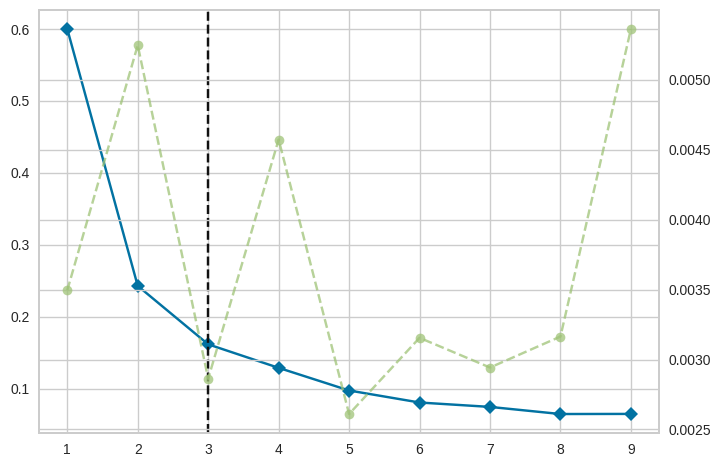

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,10)) # 여러번 반복하는 노가다를 해봄으로써 최적의 K값을 찾아보자
visualizer.fit(hour_mean_pct)

# Elbow 기법만이 정답은 아니므로 맹신은 금지

In [ ]:
k = 3
model = KMeans(n_clusters = k, random_state=10)
model.fit(hour_mean_pct)
hour_mean_pct['cluster'] = model.fit_predict(hour_mean_pct).astype(str)
hour_mean_pct

,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,...,19시,20시,21시,22시,23시,00시,01시,02시,03시,cluster
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,0.000081,0.004552,0.008117,0.016178,0.026191,0.021891,0.021837,0.029339,0.037520,0.046726,...,0.090390,0.072268,0.087353,0.083845,0.033913,0.004936,0.000017,4.046079e-06,2.532568e-07,0
강변,0.000024,0.008291,0.025803,0.077732,0.113357,0.083293,0.064157,0.059162,0.057255,0.055563,...,0.052754,0.042133,0.035969,0.024721,0.009363,0.001064,0.000013,8.376464e-07,0.000000e+00,1
건대입구,0.000273,0.015434,0.020333,0.048942,0.085799,0.057246,0.034565,0.033542,0.039427,0.043753,...,0.062243,0.063965,0.074578,0.072592,0.039948,0.005509,0.000024,3.401257e-06,2.574657e-07,2
교대,0.000024,0.002824,0.013362,0.027392,0.039924,0.032422,0.030538,0.037045,0.040450,0.049797,...,0.076263,0.059917,0.066571,0.056303,0.019653,0.003025,0.000008,1.223232e-06,4.828549e-08,0
구로디지털단지,0.000152,0.023720,0.031640,0.082793,0.110485,0.069832,0.041453,0.037087,0.040140,0.041104,...,0.069636,0.042174,0.036305,0.027793,0.011879,0.001523,0.000007,8.109990e-07,7.208880e-08,2
구의,0.000062,0.019945,0.038503,0.100581,0.170756,0.099971,0.052908,0.045156,0.046741,0.046832,...,0.035836,0.027915,0.026740,0.022971,0.011762,0.001456,0.000009,9.081125e-07,9.081125e-08,1
낙성대,0.000068,0.014260,0.032347,0.100900,0.157552,0.100492,0.053705,0.045950,0.049773,0.049978,...,0.038685,0.029423,0.028272,0.022273,0.010871,0.001438,0.000008,8.797705e-07,7.487409e-08,1
당산,0.000064,0.012068,0.031211,0.085317,0.107653,0.067679,0.046534,0.044466,0.045444,0.045285,...,0.055737,0.040463,0.040482,0.033806,0.015163,0.001854,0.000010,1.610150e-06,1.364534e-07,2
대림,0.000751,0.046771,0.042161,0.091472,0.129109,0.088984,0.053259,0.045509,0.048283,0.048544,...,0.042375,0.030377,0.024735,0.017733,0.008385,0.000965,0.000010,7.276266e-07,1.212711e-07,1


In [ ]:
# 출/퇴근 시간대 군집 시각화
fig = px.scatter(
    data_frame = hour_mean_pct[['08시', '18시', 'cluster']].reset_index(),
    x='08시',
    y='18시',
    color='cluster',
    width=700,
    height=700,
    hover_name='지하철역'
)

fig.show()

In [ ]:
for i in range(k):
    print(f'cluster {i}')
    print(list(hour_mean_pct.query(f'cluster == "{i}"').index))

cluster 0
['강남', '교대', '뚝섬', '삼성', '서초', '선릉', '성수', '시청', '역삼', '을지로3가', '을지로4가', '을지로입구', '한양대']
cluster 1
['강변', '구의', '낙성대', '대림', '봉천', '상왕십리', '서울대입구', '신답', '신대방', '신림', '신정네거리', '아현', '양천구청', '용답', '용두', '잠실나루', '잠실새내']
cluster 2
['건대입구', '구로디지털단지', '당산', '도림천', '동대문역사문화공원', '문래', '방배', '사당', '신당', '신도림', '신설동', '신촌', '영등포구청', '왕십리', '이대', '잠실', '종합운동장', '충정로', '합정', '홍대입구']


In [ ]:
coordinate = pd.read_csv('/content/data/서울시 역사마스터 정보.csv', encoding='euc-kr')
coordinate.head()

,역사_ID,역사명,호선,위도,경도
0,9996,미사,5호선,37.560927,127.193877
1,9995,강일,5호선,37.557490,127.175930
2,4929,김포공항,김포골드라인,37.562360,126.801868
3,4928,고촌,김포골드라인,37.601243,126.770345
4,4927,풍무,김포골드라인,37.612488,126.732387


In [ ]:
coordinate = coordinate.query('호선 == "2호선"')
coordinate['역사명'] = [ station_name [0] for station_name in coordinate['역사명'].str.split('(')]
coordinate.rename(
    columns = {
        '역사명' : '지하철역'
    }, inplace=True
)
coordinate

,역사_ID,지하철역,호선,위도,경도
708,250,용두,2호선,37.574028,127.038091
709,249,신정네거리,2호선,37.520074,126.852912
710,248,양천구청,2호선,37.512398,126.865819
711,247,도림천,2호선,37.514287,126.882768
712,246,신설동,2호선,37.574747,127.024932
713,245,신답,2호선,37.570040,127.046481
714,244,용답,2호선,37.561904,127.050899
715,243,충정로,2호선,37.559704,126.964378
716,242,아현,2호선,37.557345,126.956141
717,241,이대,2호선,37.556733,126.946013


In [ ]:
hour_mean_merge = hour_mean.reset_index()[['지하철역', '08시', '18시']]
coordinate_merge = coordinate[['지하철역', '위도', '경도']]
hour_mean_coor = pd.merge(
    hour_mean_merge,
    coordinate_merge,
    on='지하철역'
)
hour_mean_coor.head()

,지하철역,08시,18시,위도,경도
0,강남,64827.731343,343752.835821,37.497990,127.027912
1,강변,119168.985075,71631.000000,37.535095,127.094681
2,건대입구,94501.731343,89339.671642,37.540373,127.069191
3,교대,37022.164179,144218.925373,37.493961,127.014667
4,구로디지털단지,182999.328358,223309.611940,37.485266,126.901401


In [ ]:
hour_mean_coor['cluster'] = model.fit_predict(hour_mean_pct).astype(str)
hour_mean_coor.head()

,지하철역,08시,18시,위도,경도,cluster
0,강남,64827.731343,343752.835821,37.497990,127.027912,0
1,강변,119168.985075,71631.000000,37.535095,127.094681,2
2,건대입구,94501.731343,89339.671642,37.540373,127.069191,1
3,교대,37022.164179,144218.925373,37.493961,127.014667,0
4,구로디지털단지,182999.328358,223309.611940,37.485266,126.901401,1


In [ ]:
import folium
from folium import plugins

# 서울 센터 좌표
center = [37.541, 126.986]
m = folium.Map(
    location = center,
    zoom_start=12
)

m.add_child(
    plugins.HeatMap(
        zip(hour_mean_coor['위도'], hour_mean_coor['경도'], hour_mean_coor['08시'])
    )
)

m

In [ ]:
import folium
from folium import plugins

# 서울 센터 좌표
center = [37.541, 126.986]
m = folium.Map(
    location = center,
    zoom_start=12
)

m.add_child(
    plugins.HeatMap(
        zip(hour_mean_coor['위도'], hour_mean_coor['경도'], hour_mean_coor['18시'])
    )
)

m

In [ ]:
# 클러스터 지도 위에 표시하기
m = folium.Map(
    location = center,
    zoom_start=12
)

for idx in hour_mean_coor.index:
  lat = hour_mean_coor.loc[idx, '위도']
  lng = hour_mean_coor.loc[idx, '경도']
  title = hour_mean_coor.loc[idx, '지하철역']

  # 클러스터 확인
  station_cluster = hour_mean_coor.loc[idx, 'cluster']
  if station_cluster == "0":
    color = "#000000"
  elif station_cluster == "1":
    color = "#3A01DF"
  else:
    color = "#DF0101"

  folium.CircleMarker(
      [lat, lng],
      radius=18,
      color=color, fill=color,
      tooltip=title
  ).add_to(m)
  m

m